# Exercise : 
Get information from webpage with beautiful soup.

- https://www.crummy.com/software/BeautifulSoup/bs4/doc/
- https://www.geeksforgeeks.org/python-web-scraping-tutorial/?ref=lbp
- https://github.com/html5lib/html5lib-python

- Get the links with python job posts from this page: https://realpython.github.io/fake-jobs/
- Visualize all job types and/or other available info in the page.
- (Optinal) Get another info from website you've chosen, If you have more time for this study.

# Solution: 

In [47]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
url = "https://realpython.github.io/fake-jobs/"
text = requests.get(url).content.decode('utf-8')

In [6]:
soup = BeautifulSoup(text, "html.parser")

In [7]:
type(soup)

bs4.BeautifulSoup

In [8]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Fake Python
  </title>
  <link href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css" rel="stylesheet"/>
 </head>
 <body>
  <section class="section">
   <div class="container mb-5">
    <h1 class="title is-1">
     Fake Python
    </h1>
    <p class="subtitle is-3">
     Fake Jobs for Your Web Scraping Journey
    </p>
   </div>
   <div class="container">
    <div class="columns is-multiline" id="ResultsContainer">
     <div class="column is-half">
      <div class="card">
       <div class="card-content">
        <div class="media">
         <div class="media-left">
          <figure class="image is-48x48">
           <img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
          </figure>
         </div>
         <div class="media-content">
          <h2 c

In [9]:
soup.find_all("a")

[<a class="card-footer-item" href="https://www.realpython.com" target="_blank">Learn</a>,
 <a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html" target="_blank">Apply</a>,
 <a class="card-footer-item" href="https://www.realpython.com" target="_blank">Learn</a>,
 <a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/energy-engineer-1.html" target="_blank">Apply</a>,
 <a class="card-footer-item" href="https://www.realpython.com" target="_blank">Learn</a>,
 <a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/legal-executive-2.html" target="_blank">Apply</a>,
 <a class="card-footer-item" href="https://www.realpython.com" target="_blank">Learn</a>,
 <a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/fitness-centre-manager-3.html" target="_blank">Apply</a>,
 <a class="card-footer-item" href="https://www.realpython.com" target="_blank">Learn</a>,
 <a class="card

In [29]:
python_elements = []

for link in soup.find_all('a', href=True):
    href = link['href']
    if 'python-' in href.lower():
        python_elements.append(href)

for link in python_elements:
    print(link)

https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html
https://realpython.github.io/fake-jobs/jobs/software-engineer-python-10.html
https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-20.html
https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-30.html
https://realpython.github.io/fake-jobs/jobs/software-developer-python-40.html
https://realpython.github.io/fake-jobs/jobs/python-developer-50.html
https://realpython.github.io/fake-jobs/jobs/back-end-web-developer-python-django-60.html
https://realpython.github.io/fake-jobs/jobs/back-end-web-developer-python-django-70.html
https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-80.html
https://realpython.github.io/fake-jobs/jobs/software-developer-python-90.html


In [79]:
head_elements = {}

for head in soup.find_all("h2", class_="title"):
    if head.text in head_elements:
        head_elements[head.text] +=1
    else:
        head_elements[head.text] = 1
    
print(head_elements)



{'Senior Python Developer': 1, 'Energy engineer': 1, 'Legal executive': 2, 'Fitness centre manager': 1, 'Product manager': 1, 'Medical technical officer': 1, 'Physiological scientist': 1, 'Textile designer': 1, 'Television floor manager': 1, 'Waste management officer': 1, 'Software Engineer (Python)': 1, 'Interpreter': 1, 'Architect': 1, 'Meteorologist': 1, 'Audiological scientist': 1, 'English as a second language teacher': 1, 'Surgeon': 1, 'Equities trader': 1, 'Newspaper journalist': 1, 'Materials engineer': 2, 'Python Programmer (Entry-Level)': 3, 'Product/process development scientist': 1, 'Scientist, research (maths)': 1, 'Ecologist': 1, 'Historic buildings inspector/conservation officer': 1, 'Data scientist': 1, 'Psychiatrist': 1, 'Structural engineer': 1, 'Immigration officer': 1, 'Neurosurgeon': 1, 'Broadcast engineer': 1, 'Make': 1, 'Nurse, adult': 1, 'Air broker': 1, 'Editor, film/video': 1, 'Production assistant, radio': 1, 'Engineer, communications': 1, 'Sales executive': 

In [80]:
df = pd.DataFrame(list(head_elements.items()), columns=['Job', 'Number'])

In [81]:
df 

,Job,Number
0,Senior Python Developer,1
1,Energy engineer,1
2,Legal executive,2
3,Fitness centre manager,1
4,Product manager,1
...,...,...
87,Museum/gallery exhibitions officer,1
88,"Radiographer, diagnostic",1
89,Database administrator,1
90,Furniture designer,1


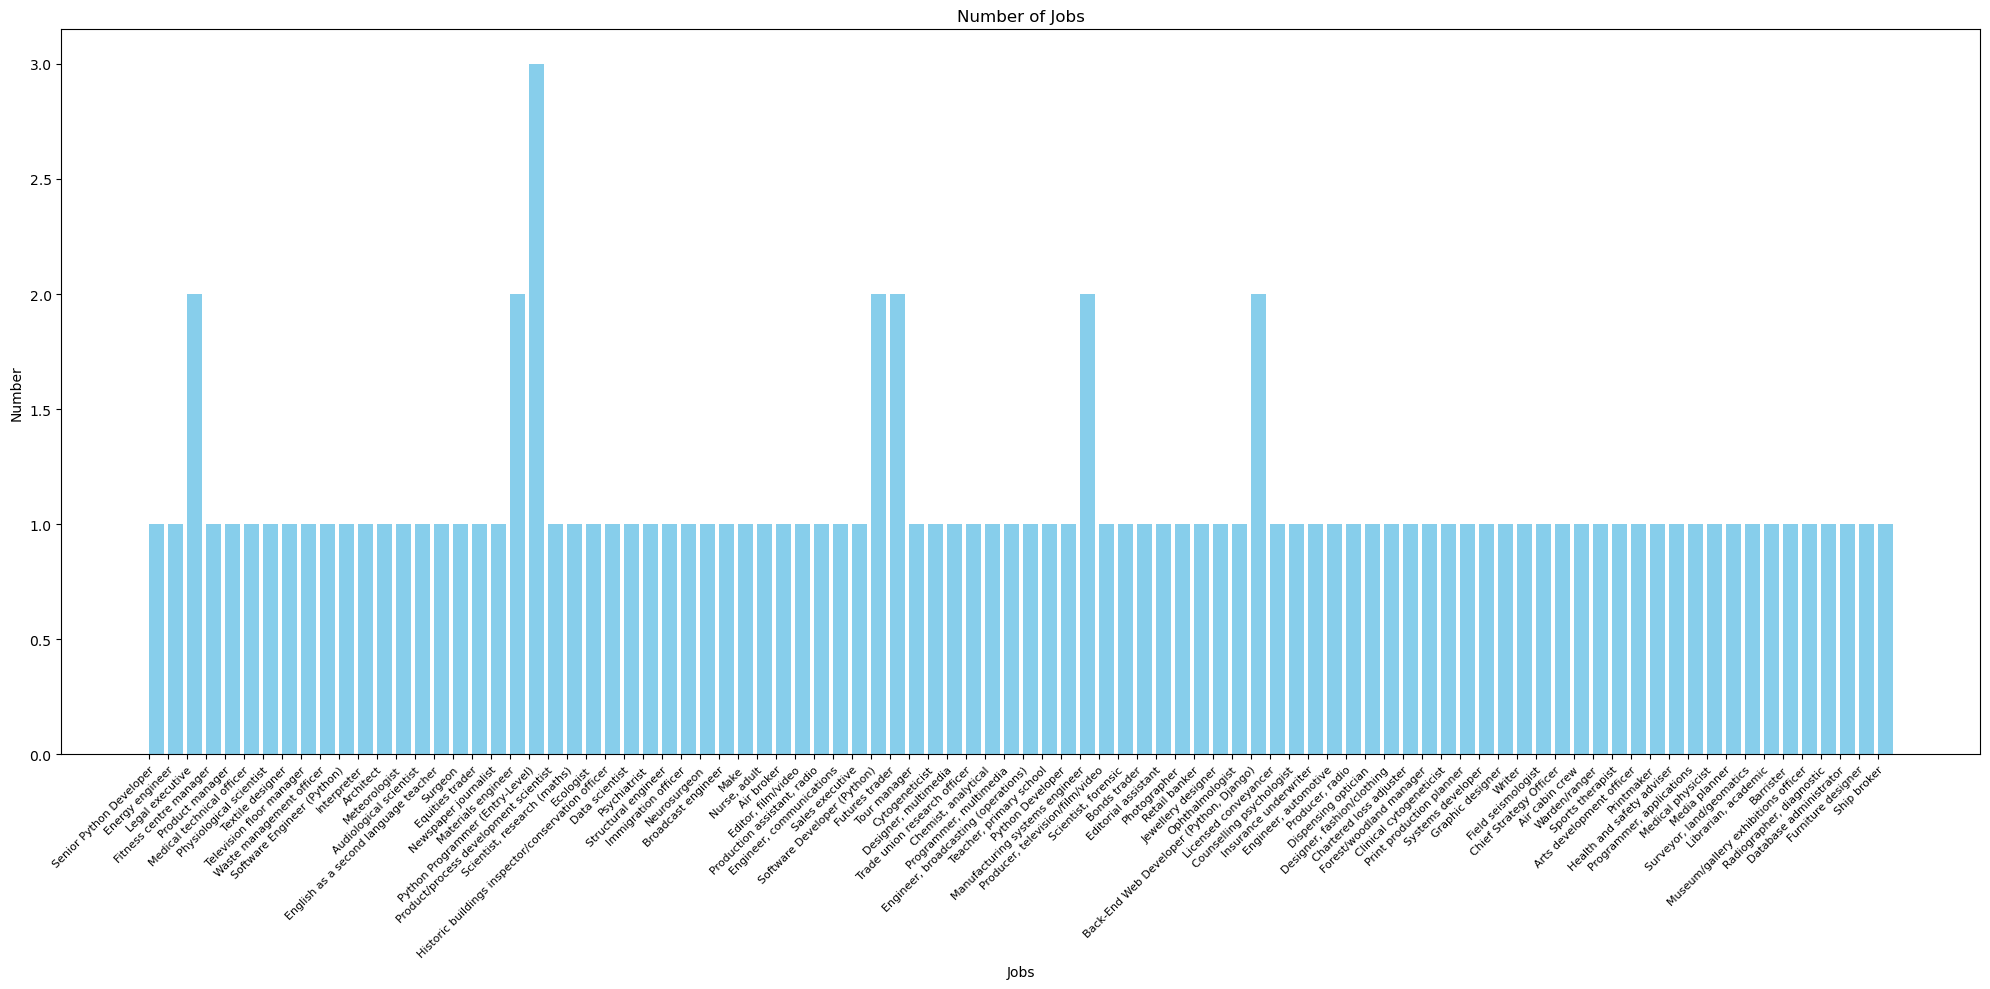

In [82]:
plt.figure(figsize=(20, 10))

plt.bar(df["Job"],df["Number"], color= "skyblue",width=0.8,align='edge')
plt.xlabel("Jobs")
plt.ylabel("Number")
plt.title("Number of Jobs")

# X ekseni yazıları döndürme ve hizalama
plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=8)

# İçeriği sığdırmak için
plt.tight_layout()  

plt.show()